# Question 1: Binary Classification Using AdaLine Algorithm


## Task :

<ul>
<li>Part A : Train the Neural Network using AdaLine Algorithm that can seperate irises. Plot the changes in the error ${(t-net)}^{2}/2$.</li>
</ul>


## Adaptive Linear Unit (AdaLine)

<img src="Images/Q2-Adaline.png" width = 500>
<img src="images/learning.png" width = 500>

## Learning Algorithm for AdaLine

<img src="images\\learningprocess.png" width = 800>


In [143]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [144]:
# Load the Iris dataset
iris = datasets.load_iris()

# Access the features and target
X = iris.data  # Features
y = iris.target  # Target


### Plotting the Dataset


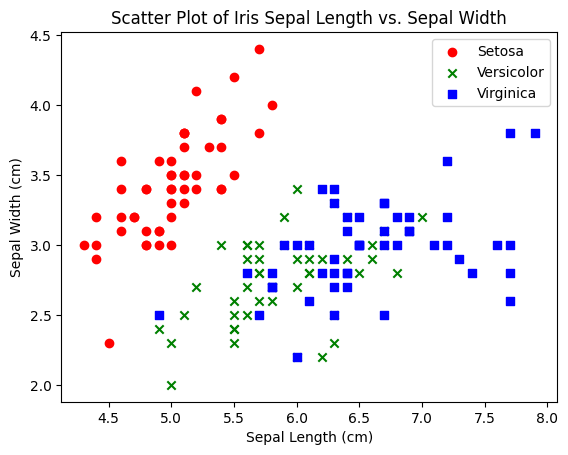

In [145]:
# Create a scatter plot for Sepal length vs. Sepal width
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
            label="Setosa", c="r", marker="o")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
            label="Versicolor", c="g", marker="x")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1],
            label="Virginica", c="b", marker="s")

# Add labels and a legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper right")

# Show the plot
plt.title("Scatter Plot of Iris Sepal Length vs. Sepal Width")
plt.show()


## 1. Part A


In [146]:
# Using only the first 2 features (Sepal length and Sepal width)
X = iris.data[:100, [0, 1]]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Setosa (-1) and Versicolor (1)


In [147]:

# Adaline class
class Adaline:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.cost = []

        for _ in range(self.n_iterations):
            net = self.net_input(X)
            errors = (y - net)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        # Identity activation function
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


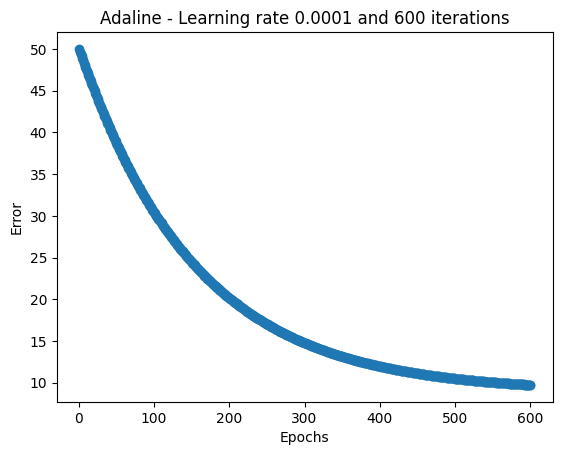

In [148]:
# Initialize and train the Adaline model
learning_rate = 0.0001
n_iterations = 600
adaline = Adaline(learning_rate, n_iterations)

# Fit the model to the training data
adaline.fit(X, y)

# Plot the error after each epoch
plt.plot(range(1, len(adaline.cost) + 1), adaline.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title(
    'Adaline - Learning rate {} and {} iterations'.format(learning_rate, n_iterations))
plt.show()


## 1. Part B


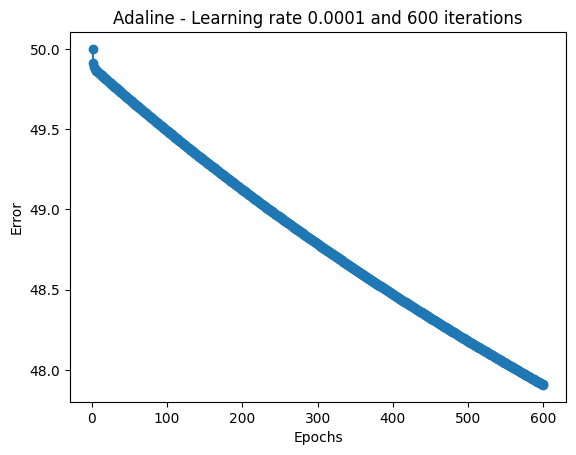

In [149]:
iris = datasets.load_iris()
# Using only the first 2 features (Sepal length and Sepal width)
X = iris.data[50:150, [0, 1]]
y = iris.target[50:150]
y = np.where(y == 1, 1, -1)  # Versicolor (1) and Non-Versicolor (-1)


# Initialize and train the Adaline model
learning_rate = 0.0001
n_iterations = 600
adaline = Adaline(learning_rate, n_iterations)

# Fit the model to the training data
adaline.fit(X, y)

# Plot the error after each epoch
plt.plot(range(1, len(adaline.cost) + 1), adaline.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title(
    'Adaline - Learning rate {} and {} iterations'.format(learning_rate, n_iterations))
plt.show()


### Question: Does `Versicolour` classified betteer than part A or not ?

Answer is NO! - the part A results was better with smooth decreasign rate of error. Here, because of high correlation between features Virginica and Versicolour the seperability between two groups using Adaline which divides into 1 and -1 was impossible.


## Madaline


## 1.Part A:

### Describe Madaline algorithms ( MRII or MRI ):

1. `MRI Algorithm`: original form of Madaline training - 1960 by Hoff and Widow - only weights of Adaline adjusts and output units are fixed.

2. `MRII Algorithms`: 1987 by Widow, Winter, and Baxter - adjusts all weights


<img src="Images/Q2-MRI.png" width = 500>


- `MRI Algorithm`:

The weights v1, v2, and the bias b3 that feed into the output unit Y are determined so that the response of unit Y is 1 if the signal it receives from either Z1 or Z2 or both be 1 and is -1 when Z1 and Z2 are both -1.

---

The wights into Y are:


<img src="Images/Q2-wights.png" width = 500>


The weights on the first Adaline (w11 and w21) and the wights on the second hidden layer Adaline (w12 and w22) are adjusted according to the algorithm.


<img src="Images/Q2-MRI-alg.png" width = 500>


- `MRII Algorithm`:

Here is the algorithm for update weights:


<img src="Images/Q2-MRII.png" width = 500>


## 2. Part B


In [150]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score


In [151]:
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)


In [152]:
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons,
                                                                            Y_moons, test_size=0.5, random_state=3)


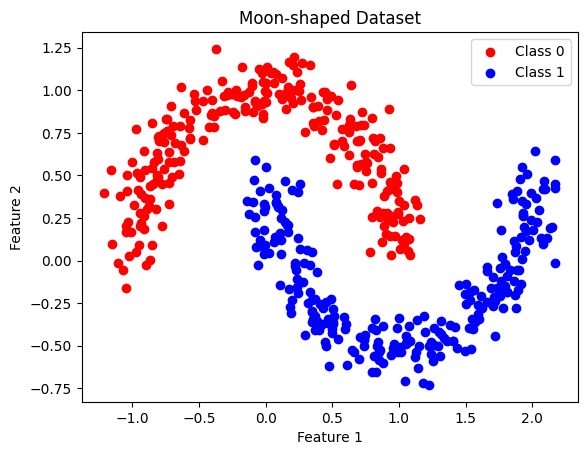

In [153]:
plt.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0][:, 1], color='red',
            label='Class 0')
plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue',
            label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()


In [154]:
class Madaline:
    def __init__(self, num_l, n_iter=500, learning_rate=0.001):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        np.random.seed(40)
        self.weights = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1

    def fit(self, X, Y):
        count = 0
        self.cost_ = []

        for _ in range(self.n_iter):
            old_weights = copy.deepcopy(self.weights)

            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1

                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :] = self.weights[ind, :] + \
                            self.learning_rate * (1 - z_in[ind]) * np.array(x)
                        self.b[ind] = self.b[ind] + \
                            self.learning_rate * (1 - z_in[ind])
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + \
                                self.learning_rate * \
                                (-1 - z_in[indice]) * np.array(x)
                            self.b[indice] = self.b[indice] + \
                                self.learning_rate * (-1 - z_in[indice])

            self.cost_.append(self.error(self.predict(X), Y))

            if np.all((self.weights - old_weights) < 0.0001) and _ > 10:
                count += 1
                if count > 10:
                    print("Total iterations with",
                          len(self.b), "lines:", _ + 1)
                    break

    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y

    def error(self, net, t):
        self.err = ((t - net) ** 2).sum() / 2.
        return self.err


In [155]:
# Split the input data into X (features) and Y (labels)
X = X_moons
Y = Y_moons

# Change label=0 to label=-1
Y[Y == 0] = -1


Accuracy of prediction for 3 neurons is: 0.888


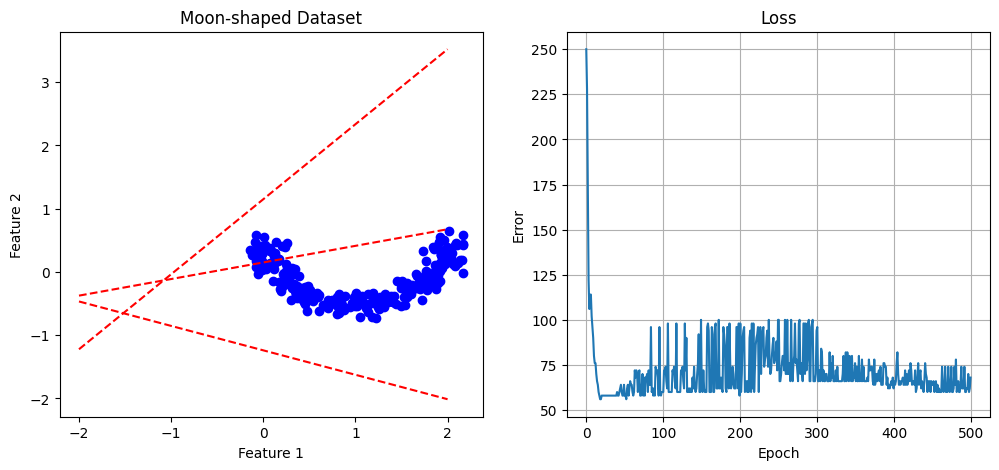

Total iterations with 5 lines: 151
Accuracy of prediction for 5 neurons is: 0.86


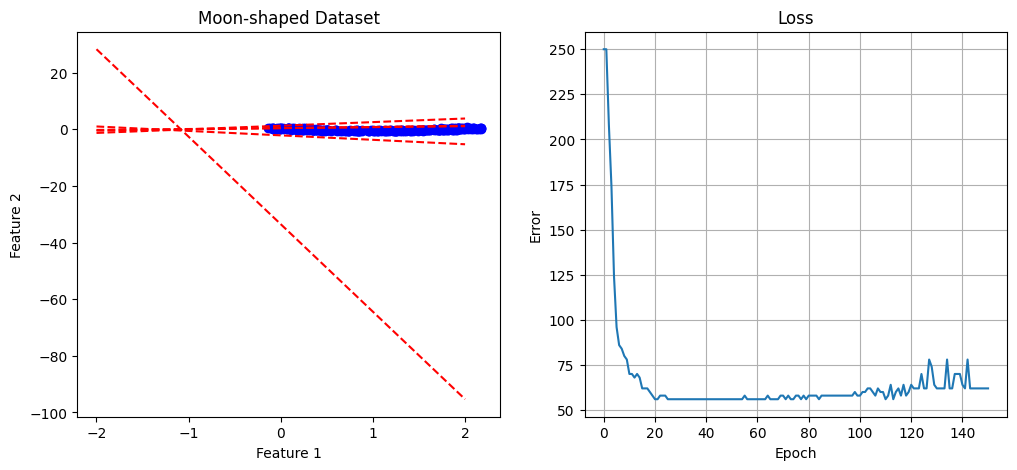

Accuracy of prediction for 8 neurons is: 0.868


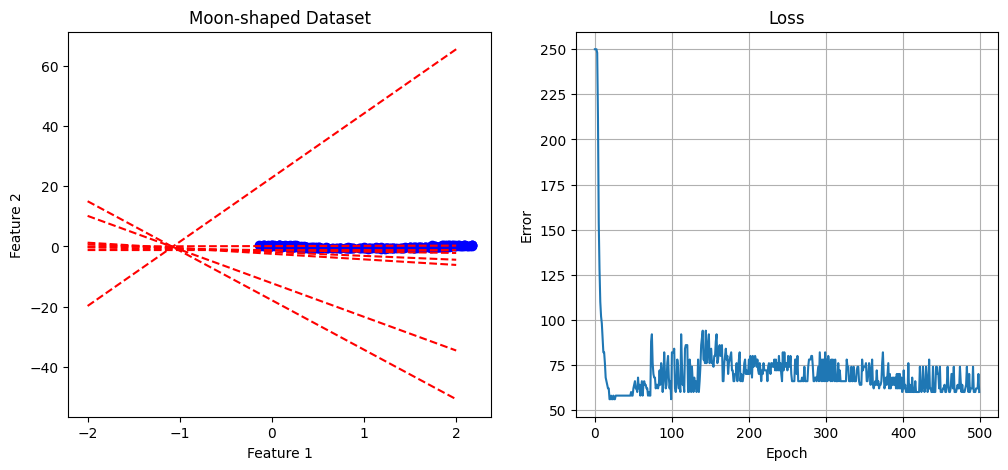

In [171]:
import matplotlib.pyplot as plt

neuron_counts = [3, 5, 8]

for i in range(3):
    # Create a figure with two subplots (moon shapes and loss/error)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Define Madaline with a different number of hidden layer neurons
    madaline = Madaline(neuron_counts[i], learning_rate=0.001)

    # Fit Madaline on X_train and Y_train
    madaline.fit(X_train, Y_train)  # Assuming you have X_train and Y_train

    # Predict X_test with Madaline model
    pred = madaline.predict(X_test)  # Assuming you have X_test

    # Calculate Madaline model accuracy
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(pred, Y_test)  # Assuming you have Y_test
    print("Accuracy of prediction for", neuron_counts[i], "neurons is:", acc)

    # Plot the moon shapes on the first subplot
    ax1.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0]
                [:, 1], color='red', label='Class 0')
    ax1.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1]
                [:, 1], color='blue', label='Class 1')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title("Moon-shaped Dataset")

    # Plot the lines produced by the Madaline model on the same subplot
    for j in range(neuron_counts[i]):
        w0, w1 = madaline.weights[j]
        b = madaline.b[j]
        x_line = [-2, 2]  # Adjust the x-axis limits as needed
        y_line = [(-w0 * x + b) / w1 for x in x_line]
        ax1.plot(x_line, y_line, color='red', linestyle='dashed')

    # Plot the loss (error) on the second subplot
    ax2.plot(madaline.cost_, label=f'{neuron_counts[i]} Neurons')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Error')
    ax2.grid()

    plt.show()


## 2. Part C

According to the results produces, we can say that best results here is achieved by having 3 neurons and adding more neurons will cause to over-fitting.
